In [168]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve


(150, 4)


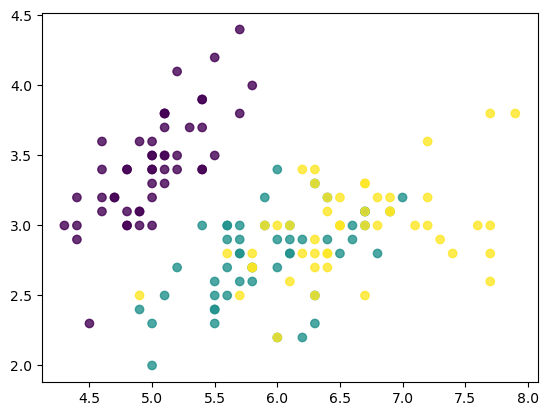

In [169]:
iris  = load_iris()
x = iris.data
y = iris.target

print(x.shape)

plt.scatter(x[:,0],x[:,1], c=y, alpha=0.8)


In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)

print("train set : ",x_train.shape)
print("test set : ", x_test.shape)

train set :  (75, 4)
test set :  (75, 4)


In [171]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

print("train set : ",x_train.shape)
print("test set : ", x_test.shape)

train set :  (120, 4)
test set :  (30, 4)


Text(0.5, 1.0, 'test set')

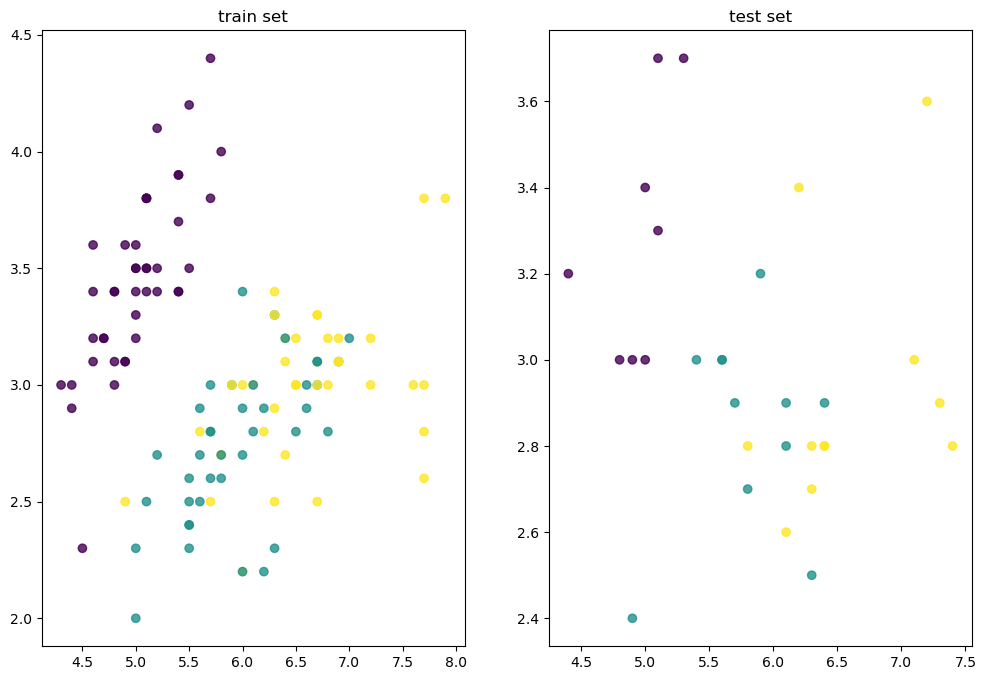

In [172]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train, alpha=0.8)
plt.title("train set")

plt.subplot(1,2,2)
plt.scatter(x_test[:,0],x_test[:,1], c=y_test, alpha=0.8)
plt.title("test set")

In [173]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

print("train score : ",model.score(x_train,y_train))
print("test score : ",model.score(x_test,y_test))

train score :  1.0
test score :  0.9


In [174]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

print("train score : ",model.score(x_train,y_train))
print("test score : ",model.score(x_test,y_test))

train score :  0.975
test score :  0.9333333333333333


In [175]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)

print("train score : ",model.score(x_train,y_train))
print("test score : ",model.score(x_test,y_test))

train score :  0.9833333333333333
test score :  0.9666666666666667


In [176]:
cross_val_score(KNeighborsClassifier(),x_train,y_train,cv=5, scoring="accuracy")

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [177]:
cross_val_score(KNeighborsClassifier(),x_train,y_train,cv=5, scoring="accuracy").mean()

0.9833333333333334

In [178]:
cross_val_score(KNeighborsClassifier(1),x_train,y_train,cv=5, scoring="accuracy").mean()

0.975

In [179]:
cross_val_score(KNeighborsClassifier(2),x_train,y_train,cv=5, scoring="accuracy").mean()

0.9666666666666668

In [180]:
cross_val_score(KNeighborsClassifier(3),x_train,y_train,cv=5, scoring="accuracy").mean()

0.975

In [181]:
cross_val_score(KNeighborsClassifier(4),x_train,y_train,cv=5, scoring="accuracy").mean()

0.9666666666666668

[0.975, 0.9666666666666668, 0.975, 0.9666666666666668, 0.9833333333333334, 0.9583333333333334, 0.9666666666666668, 0.9666666666666668, 0.9833333333333334, 0.975, 0.9833333333333334, 0.975, 0.9833333333333334, 0.975, 0.9666666666666666, 0.975, 0.975, 0.95, 0.9583333333333334, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9333333333333333, 0.925, 0.9333333333333333, 0.925, 0.9166666666666667, 0.9333333333333333, 0.9083333333333334, 0.9166666666666666, 0.9, 0.8916666666666666, 0.8916666666666668, 0.9, 0.9, 0.8916666666666666, 0.8833333333333334, 0.8916666666666666, 0.8916666666666666, 0.8916666666666666, 0.8916666666666668, 0.875, 0.875, 0.8833333333333334, 0.875, 0.8916666666666666, 0.8916666666666668]


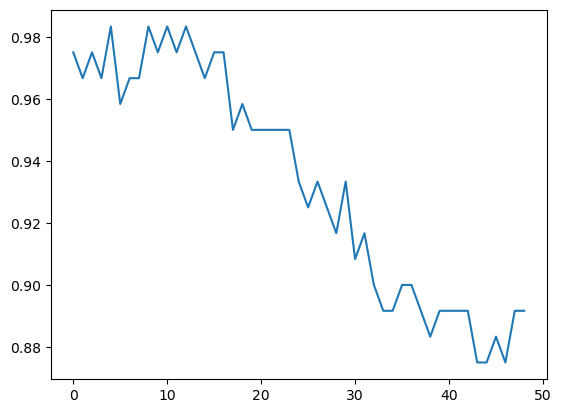

In [182]:
val_score =[]

for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k),x_train,y_train,cv=5,scoring="accuracy")
    val_score.append(score.mean())
    
print(val_score)

plt.plot(val_score)

In [183]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score,val_score = validation_curve(model,x_train,y_train,param_name="n_neighbors",param_range=k,cv=5,scoring="accuracy")

print("train score",train_score)


train score [[1.         1.         1.         1.         1.        ]
 [0.97916667 0.97916667 0.98958333 0.97916667 0.98958333]
 [0.96875    0.96875    0.97916667 0.98958333 0.98958333]
 [0.96875    0.95833333 0.97916667 0.98958333 0.98958333]
 [0.97916667 0.96875    0.97916667 0.98958333 0.98958333]
 [0.95833333 0.95833333 0.97916667 0.98958333 0.98958333]
 [0.96875    0.95833333 0.97916667 0.98958333 0.98958333]
 [0.96875    0.95833333 0.96875    0.98958333 0.97916667]
 [0.96875    0.95833333 0.97916667 0.98958333 0.98958333]
 [0.95833333 0.95833333 0.97916667 0.98958333 0.98958333]
 [0.95833333 0.96875    0.97916667 0.98958333 0.98958333]
 [0.95833333 0.94791667 0.97916667 0.98958333 0.98958333]
 [0.96875    0.96875    0.97916667 0.98958333 0.97916667]
 [0.96875    0.94791667 0.97916667 0.98958333 0.97916667]
 [0.96875    0.96875    0.97916667 0.98958333 0.96875   ]
 [0.95833333 0.94791667 0.96875    0.98958333 0.96875   ]
 [0.95833333 0.94791667 0.96875    0.98958333 0.96875   ]
 [

In [184]:
print("val_scor",val_score)

val_scor [[1.         1.         0.95833333 0.95833333 0.95833333]
 [0.95833333 1.         0.95833333 0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]
 [1.         0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         0.95833333 0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         0.95833333 1.         0.95833333 0.95833333]
 [1.         0.91666667 1.         0.95833333 0.95833333]
 [1.         0.95833333 1.         0.95833333 0.95833333]
 [1.         0.95833333 1.         0.95833333 0.95833333]
 [0.9

In [185]:
print("val_scor",val_score.shape)

val_scor (49, 5)


In [186]:
print(val_score.mean(axis=1))

[0.975      0.96666667 0.975      0.96666667 0.98333333 0.95833333
 0.96666667 0.96666667 0.98333333 0.975      0.98333333 0.975
 0.98333333 0.975      0.96666667 0.975      0.975      0.95
 0.95833333 0.95       0.95       0.95       0.95       0.95
 0.93333333 0.925      0.93333333 0.925      0.91666667 0.93333333
 0.90833333 0.91666667 0.9        0.89166667 0.89166667 0.9
 0.9        0.89166667 0.88333333 0.89166667 0.89166667 0.89166667
 0.89166667 0.875      0.875      0.88333333 0.875      0.89166667
 0.89166667]


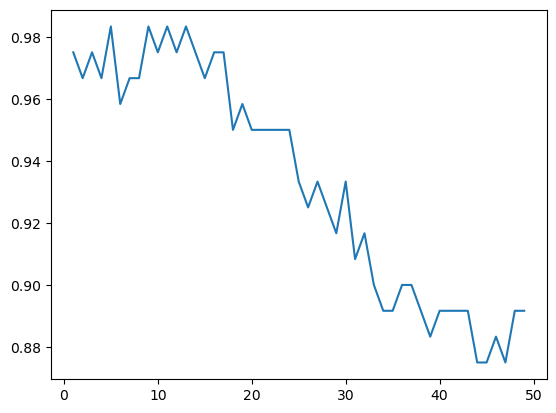

In [187]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score,val_score = validation_curve(model,x_train,y_train,param_name="n_neighbors",param_range=k,cv=5,scoring="accuracy")

plt.plot(k,val_score.mean(axis=1))


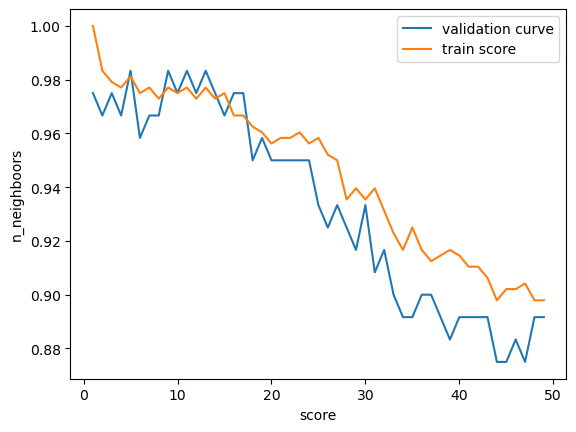

In [188]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score,val_score = validation_curve(model,x_train,y_train,param_name="n_neighbors",param_range=k,cv=5,scoring="accuracy")

plt.plot(k,val_score.mean(axis=1),label="validation curve")
plt.plot(k,train_score.mean(axis = 1), label = "train score" )

plt.xlabel("score")
plt.ylabel("n_neighboors")

plt.legend()



In [189]:
param_grid = {"n_neighbors":np.arange(1,20),
               "metric" : ["euclidean","manhattan"]}

grid  = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [190]:
print(grid.best_score_)


0.9833333333333334


In [191]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 5}


In [192]:
model = grid.best_estimator_

In [193]:
model.score(x_test,y_test)

0.9333333333333333

In [194]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [195]:
np.linspace(0.2,1.0,5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [196]:
N,train_score,val_score = learning_curve(model,x_train,y_train, train_sizes=np.linspace(0.2,1.0,5),cv=5)

print(N)

[19 38 57 76 96]


[ 9 19 28 38 48 57 67 76 86 96]


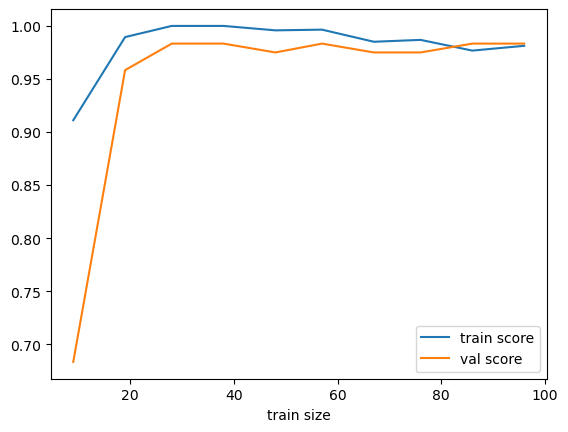

In [197]:
N,train_score,val_score = learning_curve(model,x_train,y_train, train_sizes=np.linspace(0.1,1.0,10),cv=5)

print(N)

plt.plot(N,train_score.mean(axis=1),label="train score")
plt.plot(N,val_score.mean(axis=1),label="val score")

plt.xlabel("train size")

plt.legend()

In [198]:
titanic = sns.load_dataset("titanic")

In [199]:
titanic = titanic[["survived","pclass","sex","age"]]
titanic.dropna(axis=0,inplace=True)
titanic["sex"].replace(["male","female"],[0,1],inplace=True)


/tmp/ipykernel_26882/1751431593.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["sex"].replace(["male","female"],[0,1],inplace=True)
/tmp/ipykernel_26882/1751431593.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["sex"].replace(["male","female"],[0,1],inplace=True)


In [200]:
y = titanic["survived"]
x = titanic.drop("survived",axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

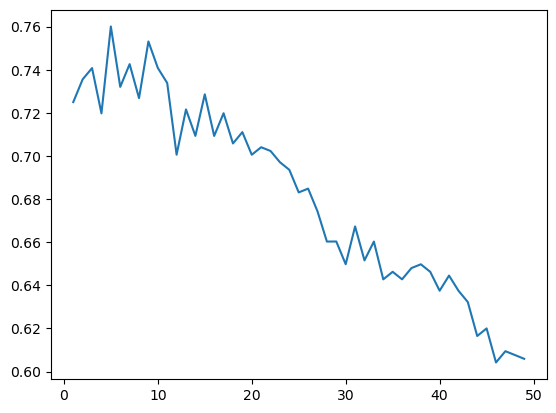

In [201]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score,val_score = validation_curve(model,x_train,y_train,param_name="n_neighbors",param_range=k,cv=5,scoring="accuracy")

plt.plot(k,val_score.mean(axis=1))

In [202]:
param_grid = {"n_neighbors":np.arange(1,20),
               "metric" : ["euclidean","manhattan"]}

grid  = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [207]:
print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5}


In [203]:
model = grid.best_estimator_

model.score(x_test,y_test)



0.7622377622377622

In [204]:
confusion_matrix(y_test,model.predict(x_test))



array([[73, 19],
       [15, 36]])

[ 45  91 136 182 228 273 319 364 410 456]


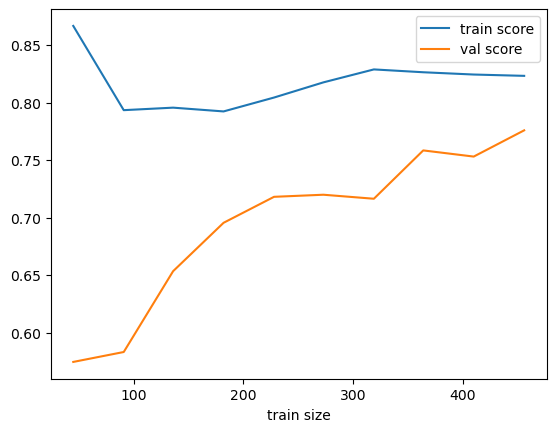

In [205]:
N,train_score,val_score = learning_curve(model,x_train,y_train, train_sizes=np.linspace(0.1,1.0,10),cv=5)

print(N)

plt.plot(N,train_score.mean(axis=1),label="train score")
plt.plot(N,val_score.mean(axis=1),label="val score")

plt.xlabel("train size")

plt.legend()